In [1]:
from ggmodel_dev.graphmodel import GraphModel, concatenate_graph_specs

In [2]:
import numpy as np


# CF is a joker to get the correct unit
energy_nodes = {
    'Pop_URB_frac': {'type': 'input',
             'unit': '%',
             'name': 'Share of Urban Population',
             },
    'Pop_RU_frac': {'type': 'input',
             'unit': '%',
             'name': 'Share of Rural Population',
             },
    'Pop':{
        'type': 'input',
        'unit': 'capita',
        'name': 'Population'
    },
    'HS_URB':{
        'type': 'input',
        'unit': '?',
        'name': 'Average Urban Household Size (UHS)'
    },
    'HS_RU':{
        'type': 'input',
        'unit': '?',
        'name': 'Average Rural Household Size (UHS)'
    },
    'HS':{
        'type': 'variable',
        'unit': '?',
        'name': 'Households',
        'computation': lambda Pop, Pop_RU_frac, Pop_URB_frac, HS_URB, HS_RU, **kwargs: Pop * (Pop_URB_frac / HS_URB + Pop_RU_frac/HS_RU)
    },
    'HS_space_heating':{
        'type': 'input',
        'unit': '%',
        'name': 'Households with Space Heating',
        
    },
    'HS_space_cooling':{
        'type': 'input',
        'unit': '%',
        'name': 'Households with space cooling',
        
    },
    'FA_cooled':{
        'type': 'input',
        'unit': '%',
        'name': 'Percentage of floor area cooled'
    },
    'FA_heated':{
        'type': 'input',
        'unit': '%',
        'name': 'Percentage of floor area heated'
    },
    'HL_rate':{
        'type': 'input',
        'unit': 'Wh/m2/C/year',
        'name': 'Specific Heat Loss Rate'
    },
    'SHD':{
        'type': 'variable',
        'unit': 'kW',
        'name': 'Space heating demand',
        'computation': lambda HS, FA_heated, HL_rate, HS_space_heating, HDD, **kwargs: HS * HS_space_heating * FA_heated * HDD * CF
    },
    'SCD':{
        'type': 'variable',
        'unit': 'kW',
        'name': 'Space cooling demand',
        'computation': lambda HS, FA_cooled, HS_space_cooling, SC, CDD, **kwargs: HS * HS_space_cooling * FA_cooled * CDD * SC * CF 
    },
    'CDD':{
        'type': 'input',
        'unit': 'day',
        'name': 'Cooling Degree Days'
    },
    'HDD':{
        'type': 'input',
        'unit': 'day',
        'name': 'Heating Degree Days'
    },
    'SC':{
        'type': 'input',
        'unit': 'kWh/m2/year',
        'name': 'Average Specific Cooling Required per household'
    },
    'Eff':{
        'type': 'input',
        'unit': '?',
        'name': 'Efficiency'
    },
    "UHC":{
        'name': 'Useful Heating Consumption',
        'type': 'variable',
        'unit': '?',
        'computation': lambda SHD, Eff,  **kwargs: SHD * Eff
    },
    "HS_size":{
        'name': 'Average Household Size',
        'type': 'input',
        'unit': '?',
    },
    'HS_WH':{
        'name': 'Households percentage with water heating',
        'type': 'input',
        'unit': '?',
    },
    'SC_WH':{
        'name': 'Specific energy consumption for WH per person per year',
        'type': 'input',
        'unit': '?'
    },
    'WHD':{
        'name': 'Water Heating Demand',
        'type': 'variable',
        'unit': 'kWh/capita/year',
        'computation': lambda HS, HS_size, SC_WH, HS_WH, HDD, **kwargs: HS * HS_size * SC_WH * HS_WH * HDD * CF
    }
}

model = GraphModel(energy_nodes)


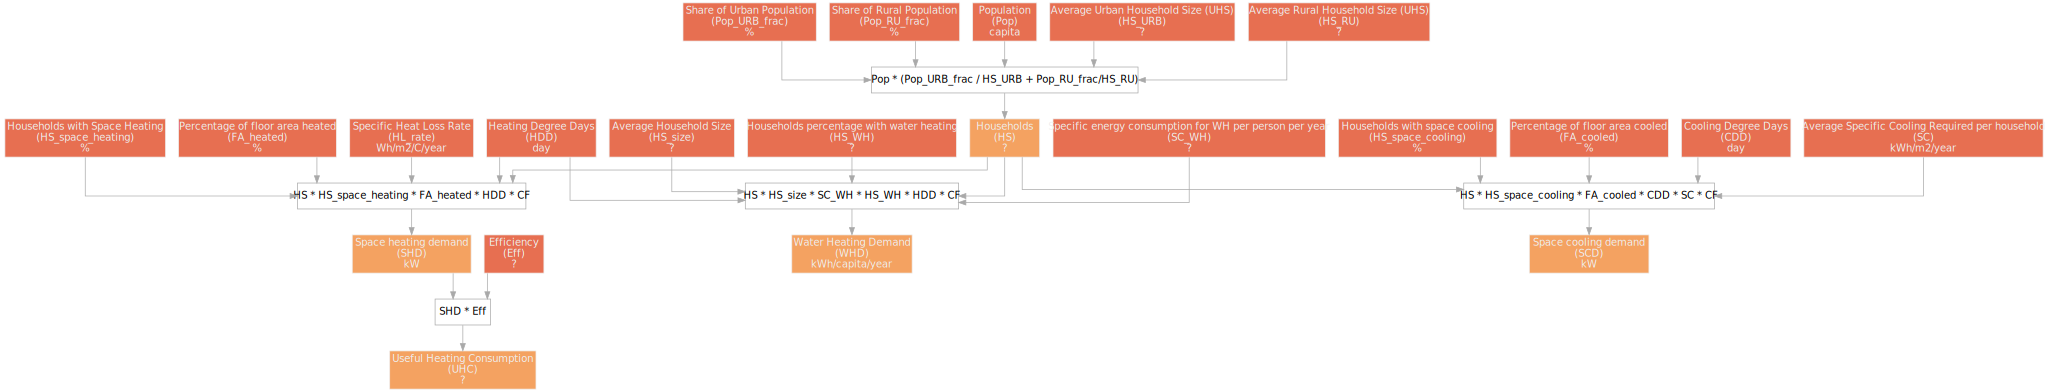

In [3]:
model.draw()

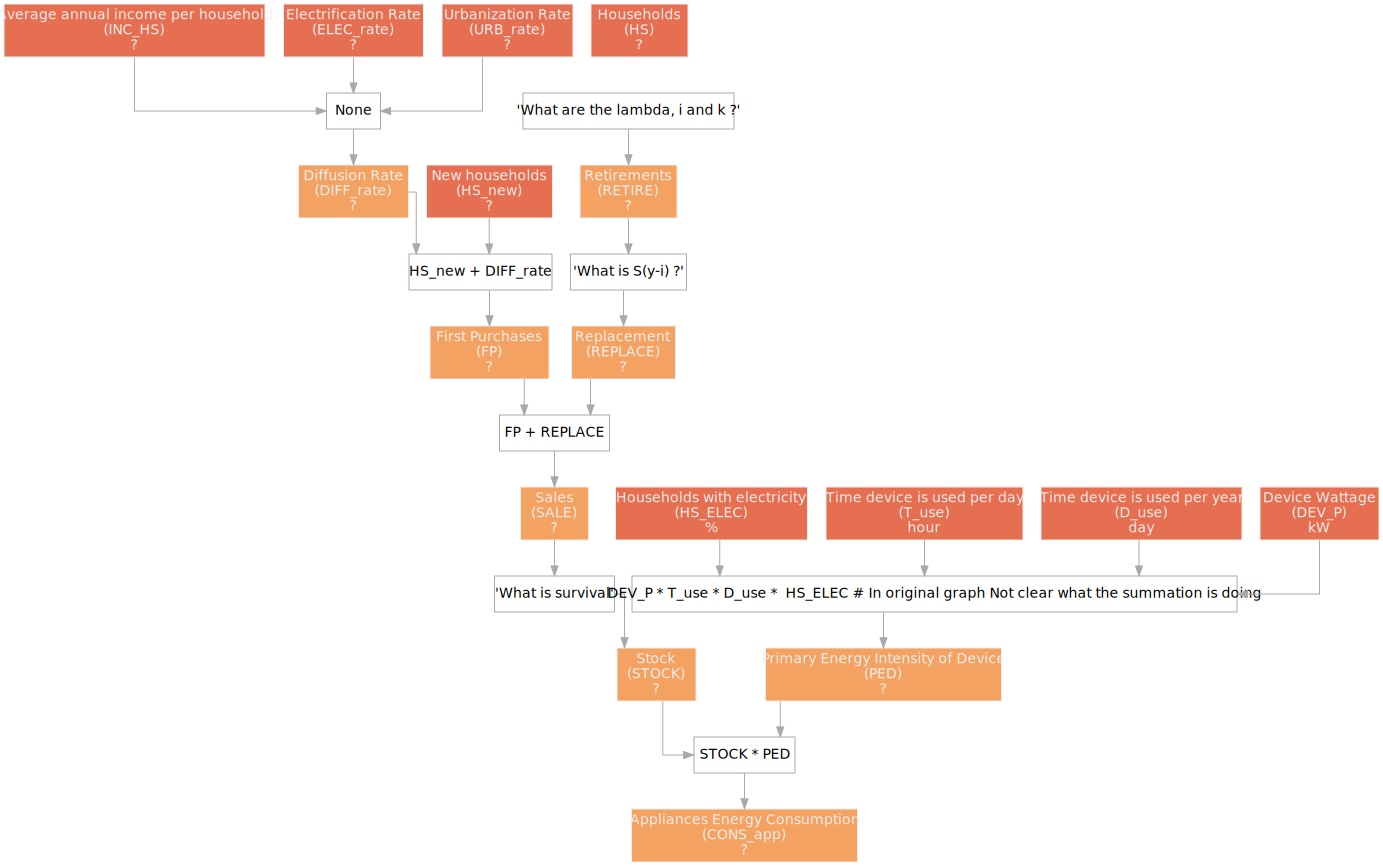

In [4]:
appliances_nodes = {
    'INC_HS':{
        'type': 'input',
        'unit': '?',
        'name': 'Average annual income per household'
    },
    'HS_new':{
        'type': 'input',
        'unit': '?',
        'name': 'New households'
    },
    'ELEC_rate':{
        'type': 'input',
        'unit': '?',
        'name': 'Electrification Rate'
    },    
    'URB_rate':{
        'type': 'input',
        'unit': '?',
        'name': 'Urbanization Rate'
    },    
    'DIFF_rate':{
        'type': 'variable',
        'unit': '?',
        'name': 'Diffusion Rate',
        'computation': lambda INC_HS, ELEC_rate, URB_rate, **kwargs: None
    }, 
    'RETIRE':{
        'type': 'variable',
        'unit': '?',
        'name': 'Retirements',
        'computation': lambda **kwargs: 'What are the lambda, i and k ?'
        
    }, 
    'REPLACE':{
        'type': 'variable',
        'unit': '?',
        'name': 'Replacement',
        'computation': lambda RETIRE, **kwargs: 'What is S(y-i) ?'
        
    }, 
    'FP':{
        'type': 'variable',
        'unit': '?',
        'name': 'First Purchases',
        'computation': lambda HS_new, DIFF_rate, **kwargs: HS_new + DIFF_rate
        
    }, 
    'SALE':{
        'type': 'variable',
        'unit': '?',
        'name': 'Sales',
        'computation': lambda FP, REPLACE, **kwargs: FP + REPLACE
        
    }, 
    'STOCK':{
        'type': 'variable',
        'unit': '?',
        'name': 'Stock',
        'computation': lambda SALE, **kwargs: 'What is survival'
        
    }, 
    'HS':{
        'type': 'input',
        'unit': '?',
        'name': 'Households',
    },
    'HS_ELEC':{
        'type': 'input',
        'unit': '%',
        'name': 'Households with electricity',
    },
    'T_use':{
        'name': 'Time device is used per day',
        'type': 'input',
        'unit': 'hour'
    },
    'D_use':{
        'name': 'Time device is used per year',
        'type': 'input',
        'unit': 'day'
    },
    'DEV_P':{
        'name': 'Device Wattage',
        'type': 'input',
        'unit': 'kW',
    },
    'PED':{
        'name': 'Primary Energy Intensity of Device',
        'type': 'variable',
        'unit': '?',
        'computation': lambda DEV_P, T_use, D_use, HS_ELEC, **kwargs: DEV_P * T_use * D_use *  HS_ELEC # In original graph Not clear what the summation is doing
    },
    'CONS_app':{
        'name': 'Appliances Energy Consumption',
        'type': 'variable',
        'unit': '?',
        'computation': lambda STOCK, PED, **kwargs: STOCK * PED
    }
}

GraphModel(appliances_nodes).draw()